In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shared import parse_line
import pickle

In [10]:
data = pd.read_csv('data/dataset copy.data')
data = data.replace('x', 1)
data = data.replace('o', -1)
data = data.replace('b', 0)

/var/folders/r7/rqh03p3x5255vwj_19ntbdpc0000gn/T/ipykernel_71713/4232293367.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('b', 0)


In [11]:

x = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]].values

data.info()

data[0:9]
x


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tl      1350 non-null   int64 
 1   tm      1350 non-null   int64 
 2   tr      1350 non-null   int64 
 3   ml      1350 non-null   int64 
 4   mm      1350 non-null   int64 
 5   mr      1350 non-null   int64 
 6   bl      1350 non-null   int64 
 7   bm      1350 non-null   int64 
 8   br      1350 non-null   int64 
 9   result  1350 non-null   object
dtypes: int64(9), object(1)
memory usage: 105.6+ KB


array([[ 1,  1, -1, ..., -1, -1,  0],
       [ 0, -1, -1, ...,  1,  1, -1],
       [ 0,  0, -1, ...,  1, -1,  0],
       ...,
       [-1,  1, -1, ...,  1, -1,  1],
       [-1,  1, -1, ...,  1, -1,  1],
       [-1, -1,  1, ..., -1,  1,  1]])

In [12]:
#Distribuição das classes
data_outcome = pd.crosstab(index=data["result"],   # Make a crosstab
                              columns="count")      # Name the count column

data_outcome

col_0,count
result,
draw,16
in_progress,392
o_win,316
x_win,626


In [13]:
draw=data.loc[data["result"]=="draw"]
in_progress=data.loc[data["result"]=="in_progress"]
o_win=data.loc[data["result"]=="o_win"]
x_win=data.loc[data["result"]=="x_win"]

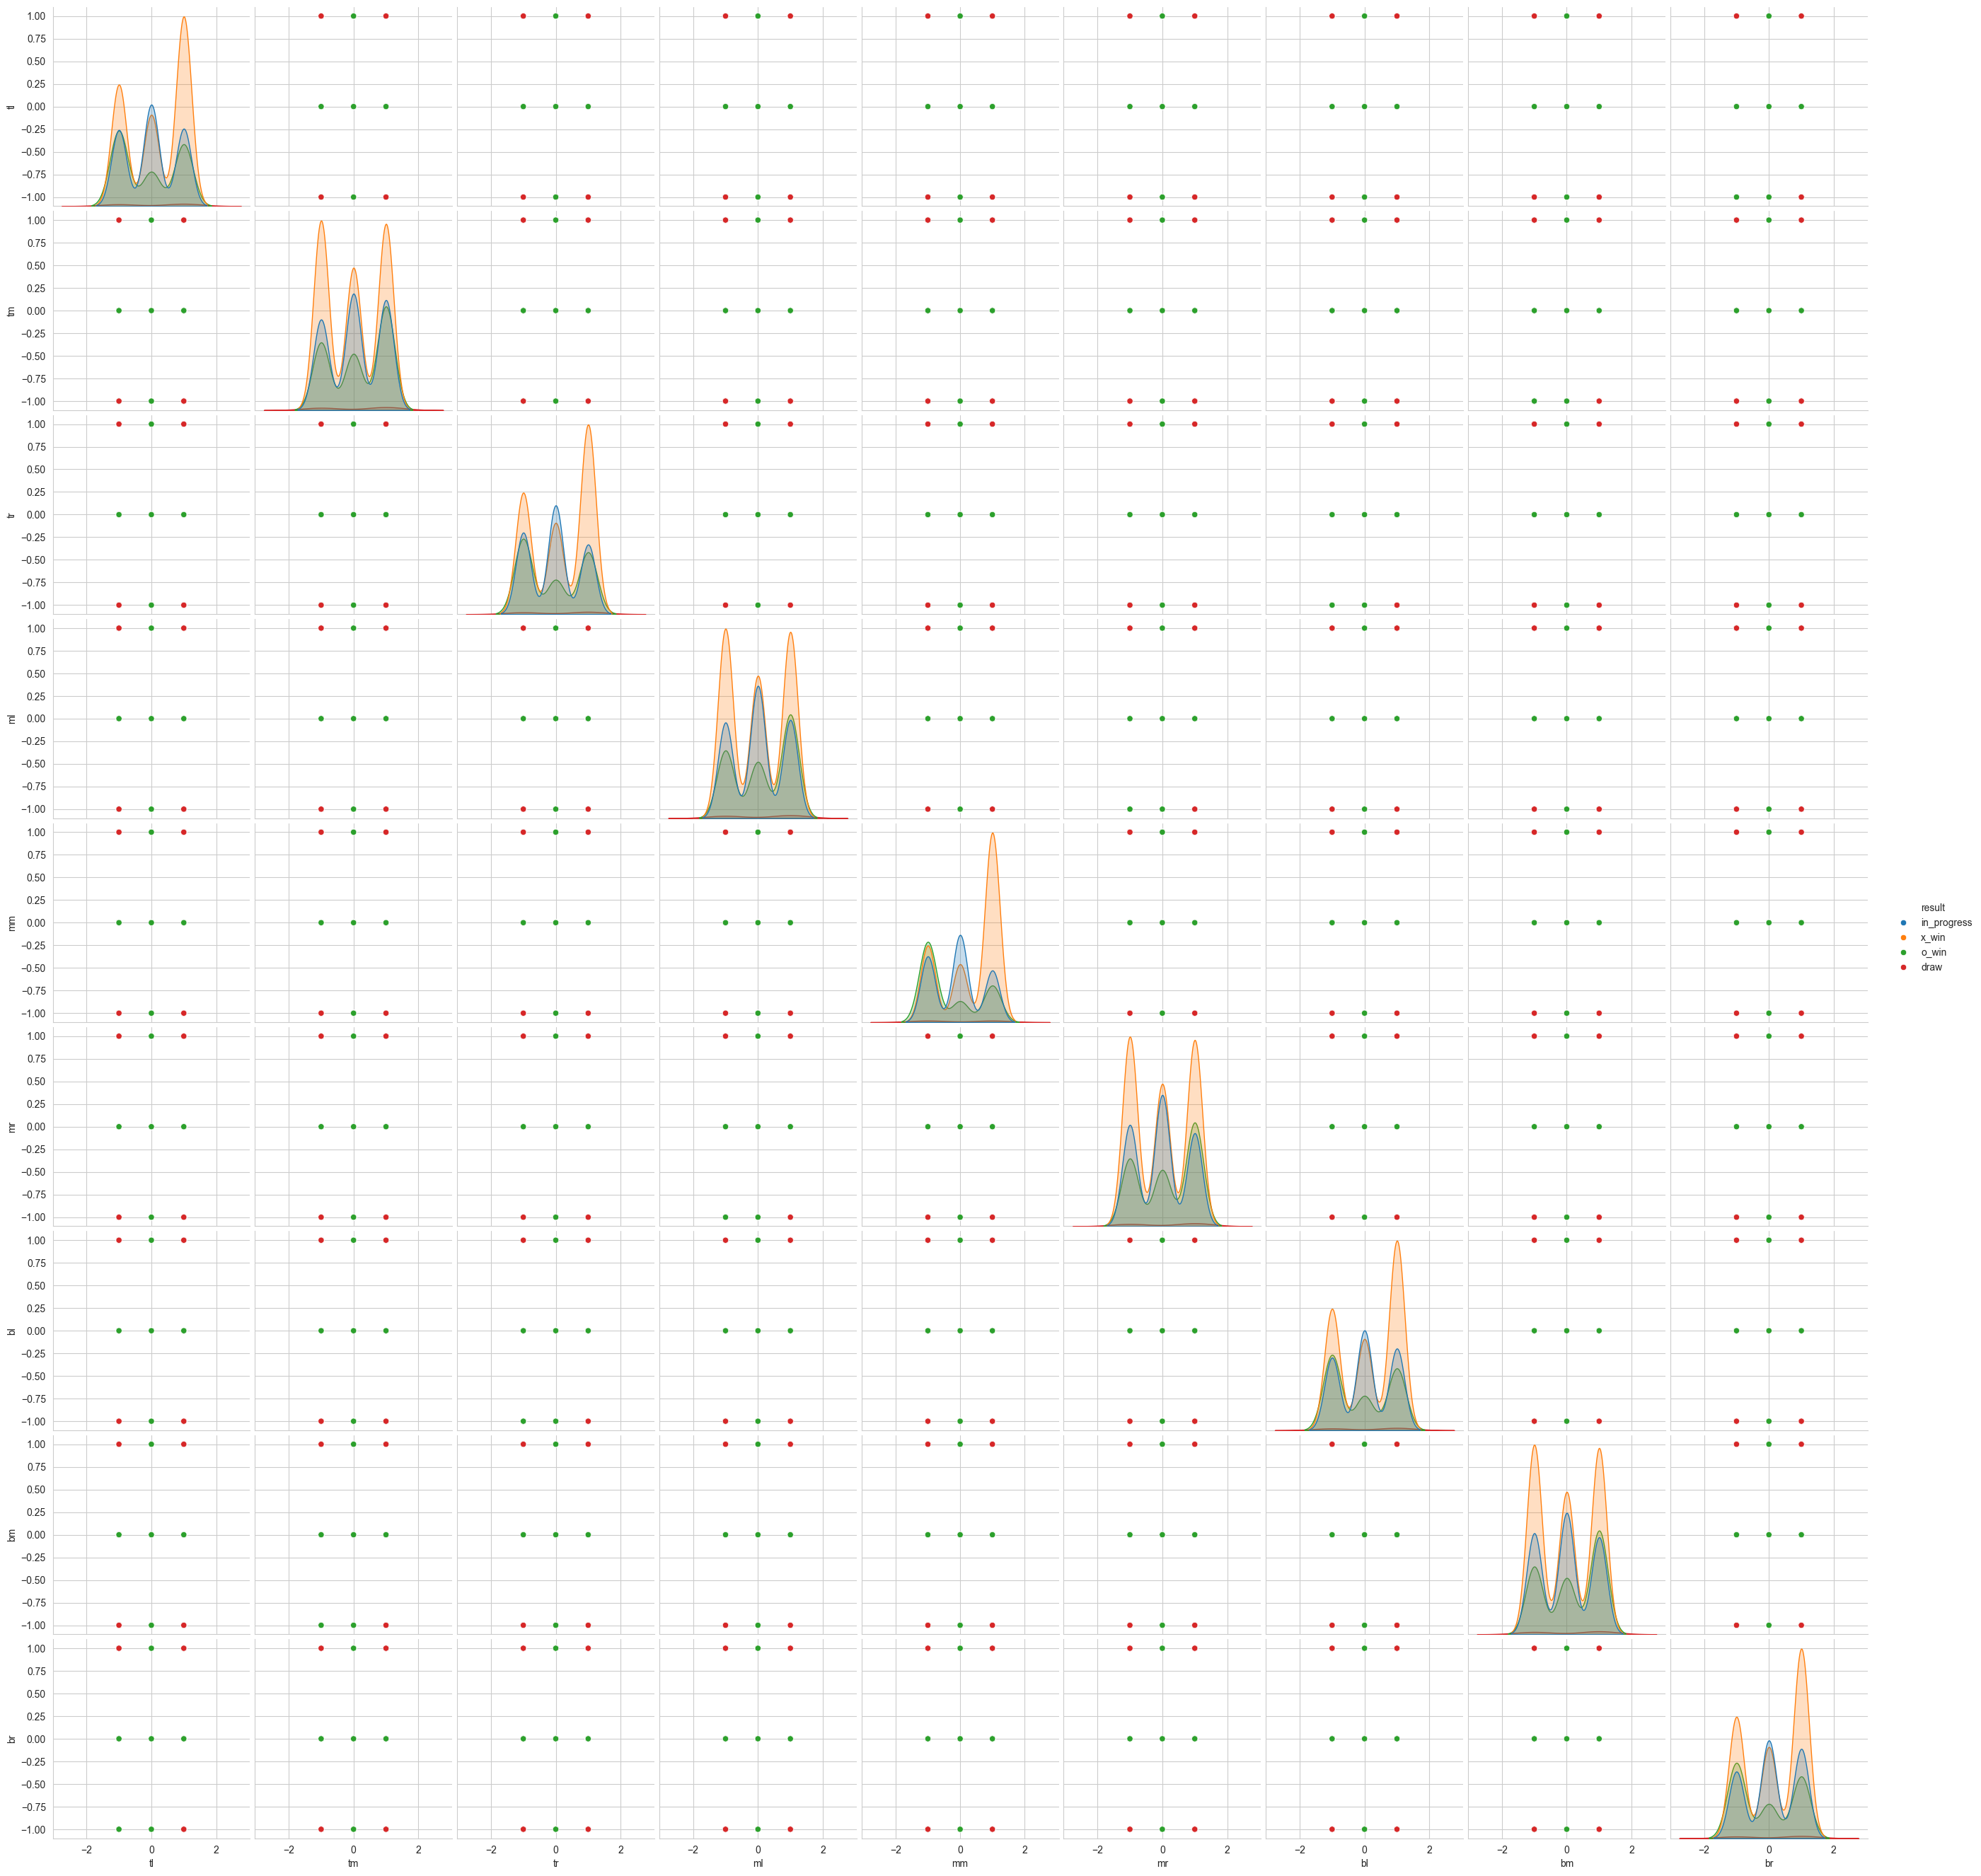

In [14]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="result",height=3);
plt.show()

In [15]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

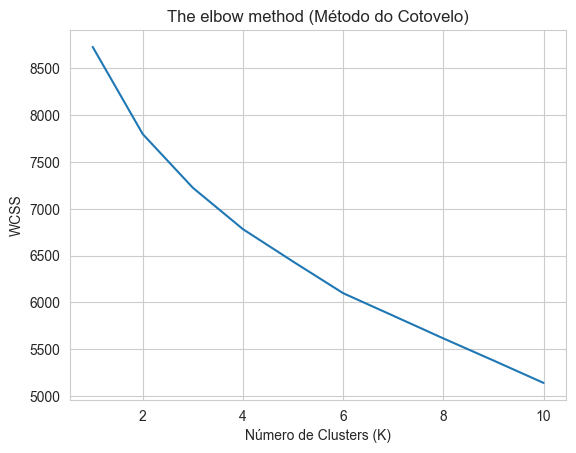

In [16]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method (Método do Cotovelo)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [18]:
C = kmeans.cluster_centers_
labels = kmeans.labels_
print("Centroides:\n", C)
print("Cluster de cada cada:\n", labels)

Centroides:
 [[ 0.43730887  0.0733945   0.19266055  0.17737003  0.08256881  0.59633028
  -0.73088685 -0.52293578  0.2324159 ]
 [-0.1196319   0.51840491 -0.2392638  -0.15030675  0.33435583 -0.26687117
  -0.53067485  0.78834356  0.08282209]
 [ 0.75354108 -0.09631728 -0.02832861  0.01133144 -0.04249292 -0.5184136
   0.77053824 -0.19830028 -0.09915014]
 [-0.82848837 -0.25290698  0.26162791  0.11046512 -0.0872093   0.32848837
   0.68895349  0.07848837  0.14534884]]
Cluster de cada cada:
 [0 3 2 ... 3 3 1]


In [19]:
k=4
for iCluster in range(0, k):
  print("Cluster: ", iCluster)
  print("Centroide: ", C[iCluster])
  for indice in range(0, len(labels)):
    if(iCluster==labels[indice]):
      print(x[indice])

Cluster:  0
Centroide:  [ 0.43730887  0.0733945   0.19266055  0.17737003  0.08256881  0.59633028
 -0.73088685 -0.52293578  0.2324159 ]
[ 1  1 -1  0  1  1 -1 -1  0]
[ 1 -1  1  1  0  0  0 -1  0]
[ 0  1  1  1 -1  0 -1 -1  1]
[ 0  0  1  1  1  0  0 -1 -1]
[ 1 -1  0  0 -1  1 -1  1  1]
[ 1  0  0 -1 -1  0 -1  0  1]
[ 0  1  0 -1 -1  0  0 -1  1]
[ 1 -1  0 -1  0  1  0  0 -1]
[ 0  1  0 -1 -1  1  0  0  0]
[ 0 -1 -1  0  1  1  0  0  0]
[ 1 -1  0 -1  0  1  0  1  0]
[ 0  1 -1  0  0  0  0 -1  1]
[ 0  1 -1  0 -1  1  0 -1  1]
[ 0  1  1 -1  1  1 -1 -1  0]
[ 1 -1  1  1 -1  1 -1  0  0]
[ 0 -1  0  1 -1  0 -1  0  1]
[ 1  0  1 -1 -1  1  0  0  0]
[ 1  1  0 -1 -1  1  0  0 -1]
[ 0  0 -1  0 -1  1  0 -1  1]
[-1  0  1  1  0  1 -1  0  0]
[ 0  0  1  1  0  1 -1 -1  0]
[ 1 -1 -1  1  0  1 -1  1  0]
[ 1  0  0 -1 -1  1 -1  0  0]
[ 0  0  0 -1  0  1 -1  0  0]
[ 0  0 -1 -1  1  1 -1 -1  1]
[ 0  0  0  0  1  1 -1 -1  0]
[ 1  0 -1  1  0  1 -1  0 -1]
[ 0 -1 -1  0  1  1  0 -1  0]
[ 0  0  0  0 -1  1  0 -1  0]
[-1  1  0  1 -1  1 -1  0

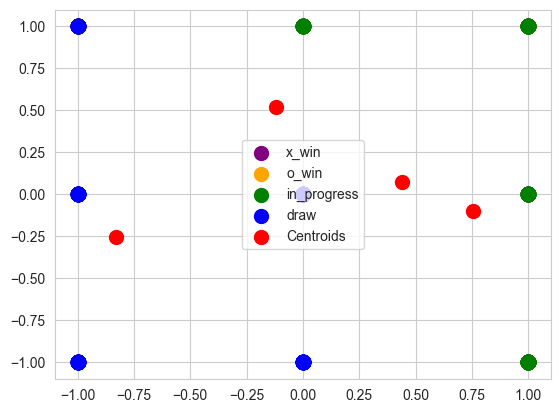

In [20]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'x_win')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'o_win')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'in_progress')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'draw')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

In [22]:
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Example usage
board_input = ['x', 'x', 'x',
               'o', 'o', 'b',
               'b', 'b', 'b']  # Example board state

# Replace 'x', 'o', 'b' with numeric values
board_input = parse_line(board_input)

# Reshape the input to match the KMeans format
board_input = np.array(board_input).reshape(1, -1)

# Predict the cluster (outcome) based on input
cluster = kmeans.predict(board_input)[0]

# Reverse label mapping to get string output
outcome_mapping = {0: 'o_win', 1: 'x_win', 2: 'draw', 3: 'in_progress'}
result = outcome_mapping[cluster]

print(f"Predicted outcome: {result}")

Predicted outcome: draw
